# Softmax Regression

I followed the tutorial [here](https://towardsdatascience.com/ml-from-scratch-logistic-and-softmax-regression-9f09f49a852c) for this notebook (because the HOML one just glosses over the concepts).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

sns.set_theme(style = "whitegrid")

A basic logistic regression class

In [2]:
class Sigmoid():
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

In [3]:
class LogisticRegression():

    def __init__(self, n_iter = 3000, lr=1e-1):
        self.n_iter = n_iter
        self.lr = lr
        self.sigmoid = Sigmoid()

    def fit(self, X, y):
        # insert bias term
        X = np.insert(X, 0, 1, axis=1)
        
        n_features = X.shape[1]
        
        # random initilization of theta
        limit = np.sqrt(2 / n_features)
        self.coef_ = np.random.uniform(-limit, limit, (n_features,))

        # the batch gradient descent iterations
        for _ in range(self.n_iter):

            # calculate the logistic of predictions
            y_preds = self.sigmoid(X.dot(self.coef_))

            # gradients of cost function
            gradients = X.T.dot(y_preds - y)

            # update the weights
            self.coef_ -= self.lr * gradients

        return self

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        y_preds = np.round(self.sigmoid(
            X.dot(self.coef_)
        )).astype(int)

        return y_preds

    def predict_proba(self, X):
        X = np.insert(X, 0, 1, axis=1)
        probas = self.sigmoid(X.dot(self.coef_))

        return probas

testing the class (my test)

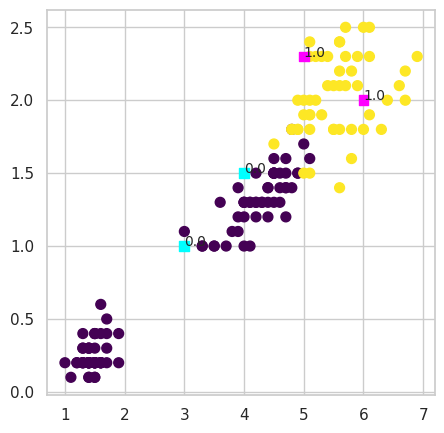

In [4]:
iris = datasets.load_iris()

X = iris["data"][:, 2:] # petal width
y = (iris["target"] == 2).astype(np.int32) # 1 if Iris-Virginica, else 0

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_test = np.array(
    [
        [6.0, 2.0],
        [5.0, 2.3],
        [3.0, 1.0],
        [4.0, 1.5]
    ]
)
y_test = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)

_, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=50)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="cool", s=50, marker="s")

# mark y_proba on the plot
for i, proba in enumerate(y_proba):
    ax.text(X_test[i, 0], X_test[i, 1], s=round(proba, 2), fontsize=10)

plt.show()

Testing the class (from the tutorial)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# could not import these for some reason
# from mlscratch.utils.metrics import accuracy_score
# from mlscratch.utils.preprocessing import StandardScaler
# from mlscratch.supervised.logistic import LogisticRegression

def test_logistic_iris():

    iris = datasets.load_iris()
    X = iris.data[iris.target != 0]
    y = iris.target[iris.target != 0]
    y[y==1] = 0
    y[y==2] = 1

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    scaler.fit_transform(X_train)
    scaler.transform(X_test)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_preds = clf.predict(X_test)

    score = accuracy_score(y_test, y_preds)

    return score > 0.80

test_logistic_iris()

True

For each instance, the Softmax Regression model computed a score for each class, then estimates the probability the instance belongs to each class by applying the softmax function to the scores:

$\hat{p}_k = \frac{e^{(s_k(x))}}{\sum_{j=1}^{K} e^{(s_k(x))}}$

- $K$ is the number of classes
- $s(x)$ is a vector containing the scores of each class for the instance x

> my issue with HOML was that I'm not sure if there is a smarter way - perhaps a vectorised of approach of calculating $s(x)$